# Avacado Project

# Problem description:

Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .


The goal is to predict the average price which is continuous in nature of the different type of avocado and using the region that in which region they are lying.

In [2]:
#import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score

Importing the Dataset

In [2]:
data=pd.read_csv('avocado.csv')

# EDA

In [3]:
data.shape

(18249, 14)

In [4]:
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [5]:
data.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

# Details of Columns in Dataset

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold

In [6]:
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [8]:
#As we see that "index" column beacuse it have no effect on dataset
data.drop('Unnamed: 0',inplace=True,axis=1)

In [9]:
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [10]:
#Extract the Month from DOB into separate column
data['Month'] = pd.DatetimeIndex(data['Date']).month
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1


In [11]:
#Extract the Date from DOB into separate column
data['Date'] = pd.DatetimeIndex(data['Date']).day
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,6,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,4,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2
18245,28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1
18246,21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1
18247,14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1


In [12]:
#checking the value counts of each type
data.type.value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [13]:
#co relation of total volume to total bag
data[['Total Volume','Total Bags']].corr()

,Total Volume,Total Bags
Total Volume,1.000000,0.963047
Total Bags,0.963047,1.000000


In [14]:
#checking the average year of volume of avacado per year
data.groupby('year')['Total Volume'].mean()

year
2015    7.810274e+05
2016    8.584206e+05
2017    8.623393e+05
2018    1.066928e+06
Name: Total Volume, dtype: float64

In [15]:
#checking the organic type of avacado 
organic = data[data['type'] == 'organic']
organic

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
9126,27,1.83,989.55,8.16,88.59,0.00,892.80,892.80,0.00,0.0,organic,2015,Albany,12
9127,20,1.89,1163.03,30.24,172.14,0.00,960.65,960.65,0.00,0.0,organic,2015,Albany,12
9128,13,1.85,995.96,10.44,178.70,0.00,806.82,806.82,0.00,0.0,organic,2015,Albany,12
9129,6,1.84,1158.42,90.29,104.18,0.00,963.95,948.52,15.43,0.0,organic,2015,Albany,12
9130,29,1.94,831.69,0.00,94.73,0.00,736.96,736.96,0.00,0.0,organic,2015,Albany,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,4,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2
18245,28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1
18246,21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1
18247,14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1


In [16]:
#checking the mean of price at each year of organic type of avacado
organic.groupby('year')['AveragePrice'].mean()

year
2015    1.673324
2016    1.571684
2017    1.735521
2018    1.567176
Name: AveragePrice, dtype: float64

In [17]:
#finding how much type of avacado is sell in last 4 year
data.groupby('year')['type'].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

In [18]:
#total no of sale in each year of  4 years
data.groupby('year')['Total Volume'].count()

year
2015    5615
2016    5616
2017    5722
2018    1296
Name: Total Volume, dtype: int64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  int64  
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
 13  Month         18249 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 1.9+ MB


<AxesSubplot:>

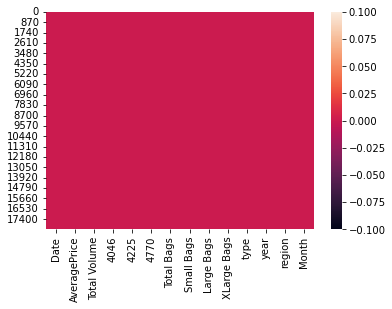

In [20]:
#checking null values using heatmap
sns.heatmap(data.isnull())

In [21]:
data.describe()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000
mean,15.662612,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215
std,8.776281,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130
min,1.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000
25%,8.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000
50%,16.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000
75%,23.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000
max,31.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000


There multiple outliers mostly in XLargeBags There is also difference between mean and 50% value in some of the columns which used to get fix for better prediction.

# Data Visualization

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

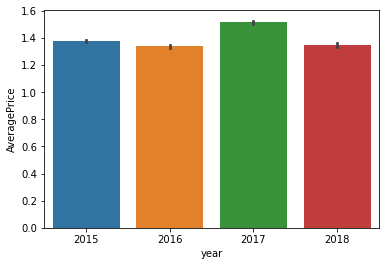

In [22]:
#checking ratio of year and price that which year had max average price
sns.barplot(x = "year" , y = "AveragePrice" ,data=data)

Average Price of 2017 is Highest , other Year's Average Price is nearly similar .

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

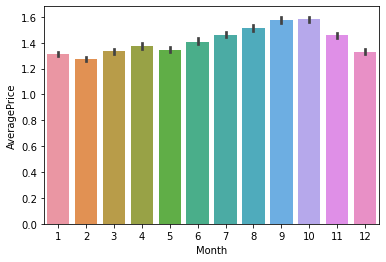

In [23]:
#checking ratio of month and price that which year had max average price
sns.barplot(x = "Month" , y = "AveragePrice" ,data=data)

Average Price of Sept and Oct are Highest , Average Price of Feb is Lowest .

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

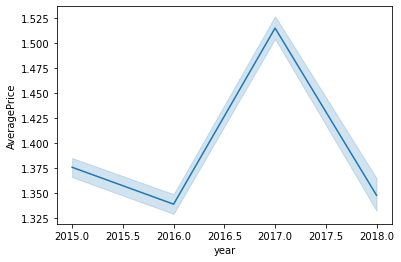

In [24]:
sns.lineplot(x = 'year', y = 'AveragePrice', data=data)

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

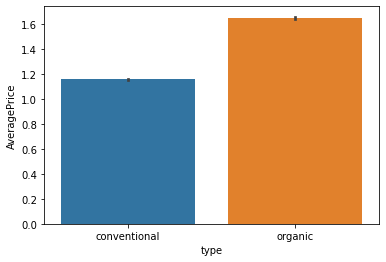

In [25]:
#checking ratio of type and price that which year had max average price
sns.barplot(x = "type" , y = "AveragePrice" ,data=data)

Average price of Organic Type of Avocado has more price than that of Convenctional.

From above we came to know that:

1)Year 2017 is that year where the price is maximum as compared to other year, and there is less difference among rest of the year.

2)September and October are the month where max no of average price is there.

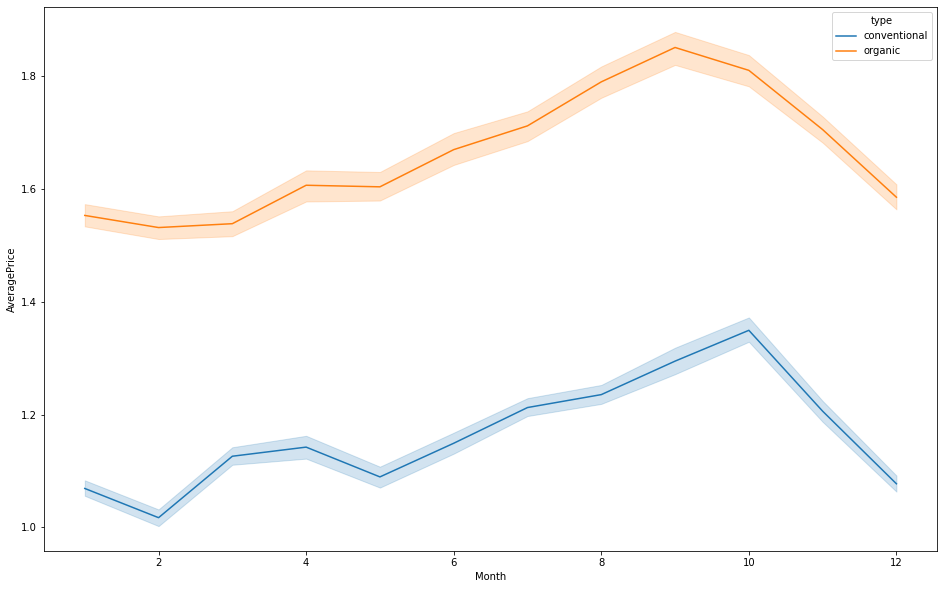

In [26]:
plt.figure(figsize=(16,10))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=data)
plt.show()

There is increase of prices between month 8-10 of both type of avacado.

Text(0.5, 1.0, 'ration of Price and Region')

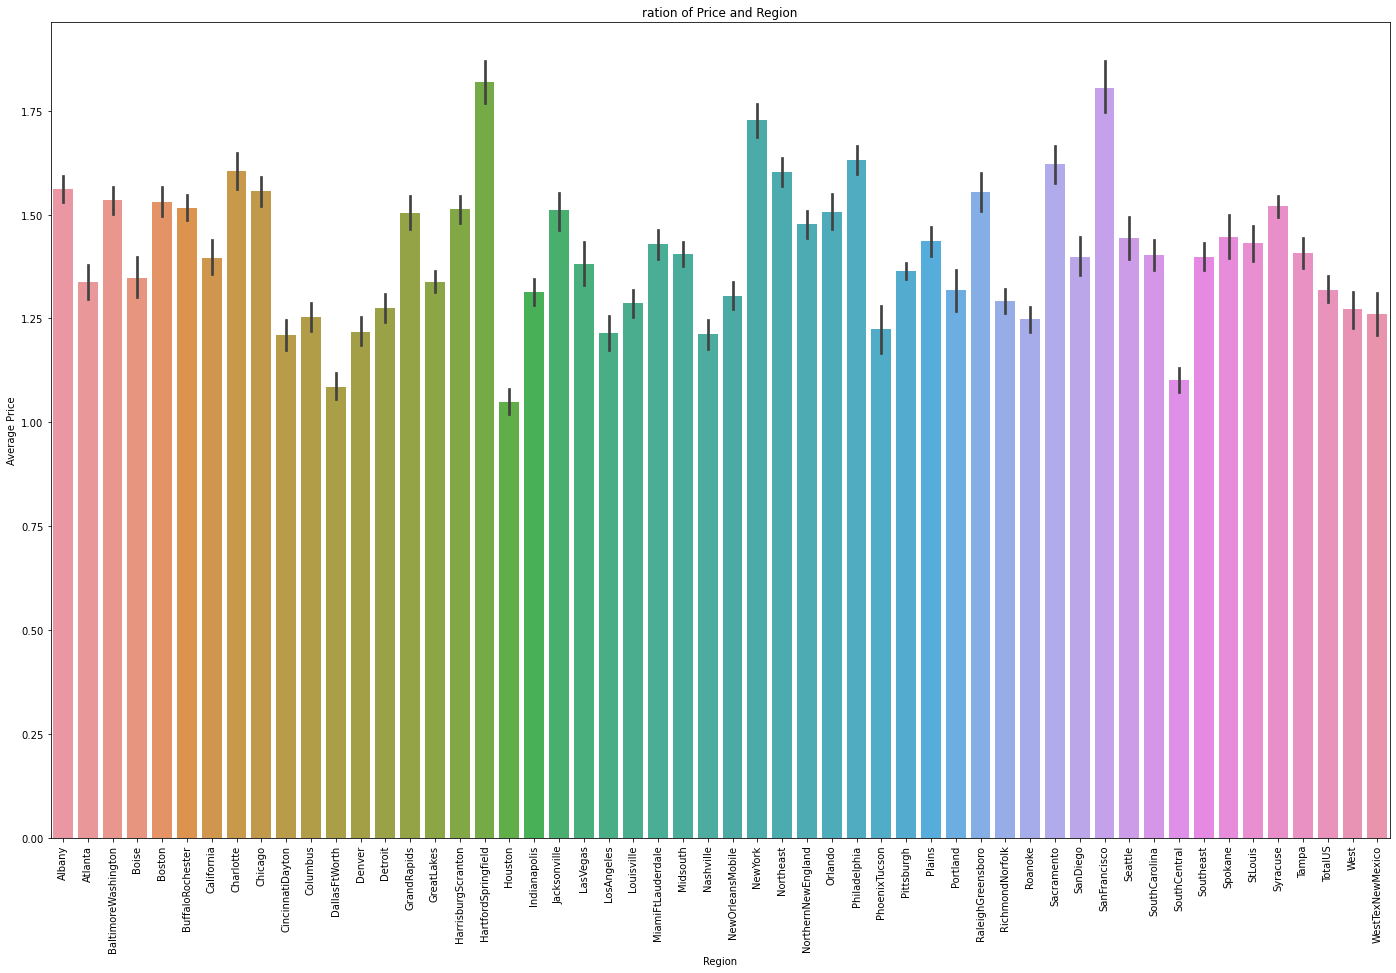

In [27]:
plt.figure(figsize=(24,15))
sns.barplot(x='region',y='AveragePrice',data=data)
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('ration of Price and Region')

The HartfordSpringfield ,SanFrancisco and NewYork are having more average price as compared to other region.

Text(0.5, 1.0, 'Average_Price')

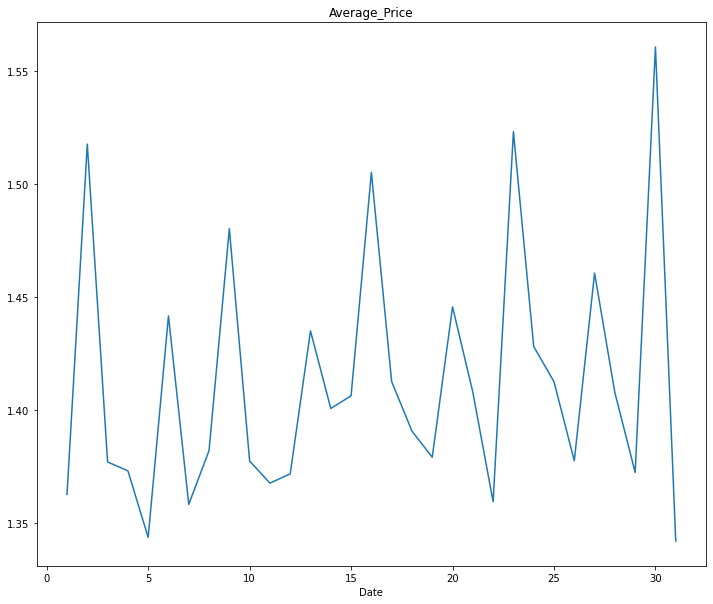

In [28]:
date=data.groupby('Date').mean()
plt.figure(figsize=(12,10))
date['AveragePrice'].plot()
plt.title('Average_Price')

On Date 28,29 and 30 the price of avacado is high.

Text(0.5, 1.0, 'Average_Price')

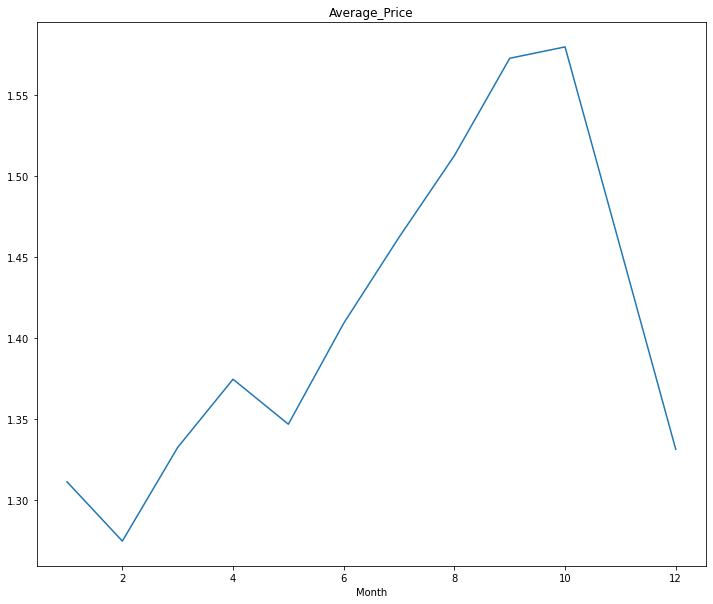

In [29]:
month=data.groupby('Month').mean()
plt.figure(figsize=(12,10))
month['AveragePrice'].plot()
plt.title('Average_Price')

The Prices are higher between august to october comapared to other months

array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>],
       [<AxesSubplot:title={'center':'4225'}>,
        <AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>],
       [<AxesSubplot:title={'center':'Large Bags'}>,
        <AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'Month'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

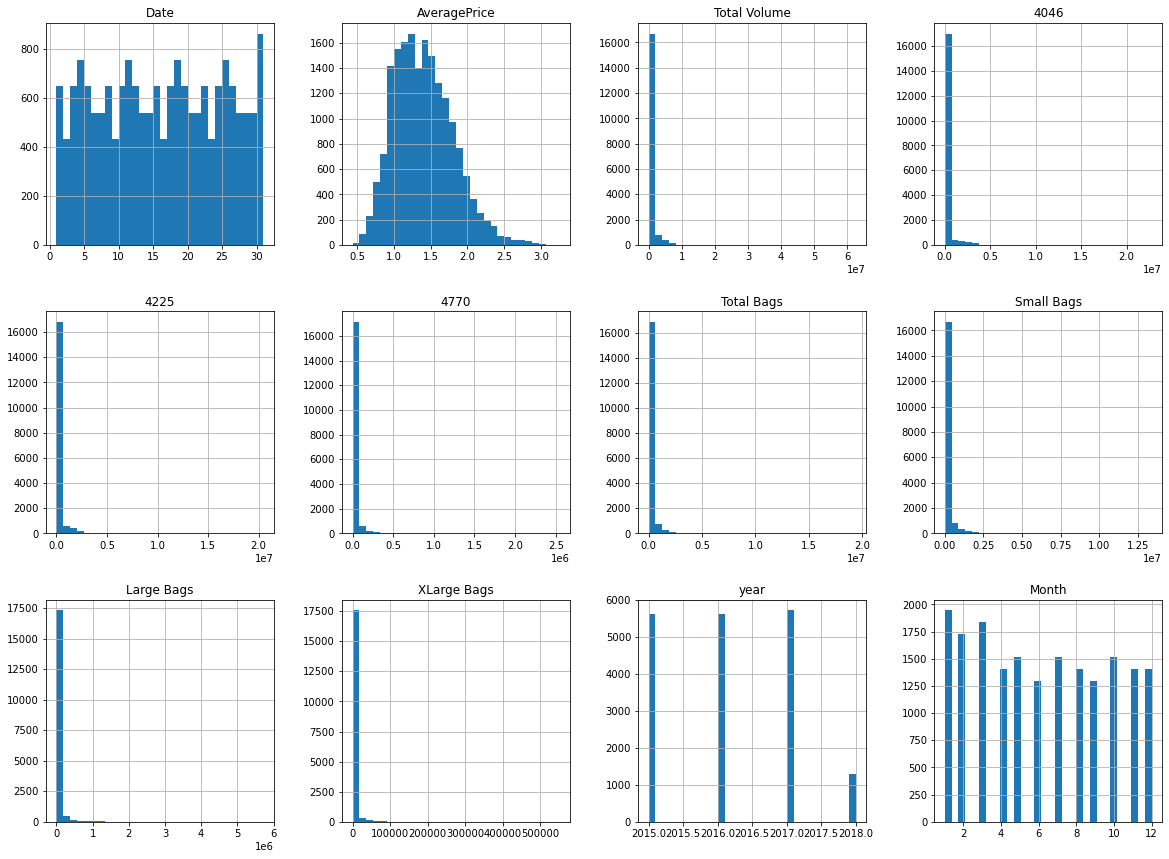

In [30]:
#plotting histogram for univariate analysis and checking the Normal Distribution
data.hist(figsize=(20,20), grid = True, layout = (4,4), bins = 30)

From plotting this histogram:-
 

1)Average price column is normally distributing over the histogram.

2)Rest of the data are not much varying in term of numbers, so they are almost left skewed data

In [31]:
data['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [32]:
#Making the categorical data into numercial for better EDA
column = ['type','region']
le = LabelEncoder()
for i in column:
    data[i] = le.fit_transform(data[i].astype(str))

print(data.dtypes)

Date              int64
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int64
region            int32
Month             int64
dtype: object


In [33]:
data.type  =data.type.astype(float)

In [34]:
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015,0,12
1,20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015,0,12
2,13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015,0,12
3,6,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015,0,12
4,29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,4,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,2018,53,2
18245,28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,2018,53,1
18246,21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,2018,53,1
18247,14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,2018,53,1


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  int64  
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  float64
 11  year          18249 non-null  int64  
 12  region        18249 non-null  int32  
 13  Month         18249 non-null  int64  
dtypes: float64(10), int32(1), int64(3)
memory usage: 1.9 MB


In [ ]:
#plotting the boxplot of each column to check the outliers 
#df.plot(kind='box',subplots = True,layout=(4,5),figsize = (15,10))

In [41]:
#calculate the zscore
z = np.abs(zscore(data))
print(z)

           Date  AveragePrice  Total Volume      4046      4225      4770  \
0      1.291857      0.188689      0.227716  0.230816  0.199902  0.212091   
1      0.494231      0.139020      0.230427  0.231103  0.208054  0.211997   
2      0.303396      1.182069      0.212085  0.231007  0.154478  0.211325   
3      1.101022      0.809551      0.223444  0.230741  0.185350  0.211864   
4      1.519750      0.312861      0.231538  0.230891  0.208719  0.211834   
...         ...           ...           ...       ...       ...       ...   
18244  1.328915      0.556347      0.241373  0.230017  0.243857  0.212540   
18245  1.405803      0.755023      0.242296  0.230693  0.242277  0.212540   
18246  0.608177      1.152375      0.242331  0.230693  0.243090  0.205766   
18247  0.189449      1.301382      0.241625  0.230428  0.242651  0.205774   
18248  0.987075      0.531512      0.241253  0.229347  0.243170  0.210450   

       Total Bags  Small Bags  Large Bags  XLarge Bags      type      year 

[]

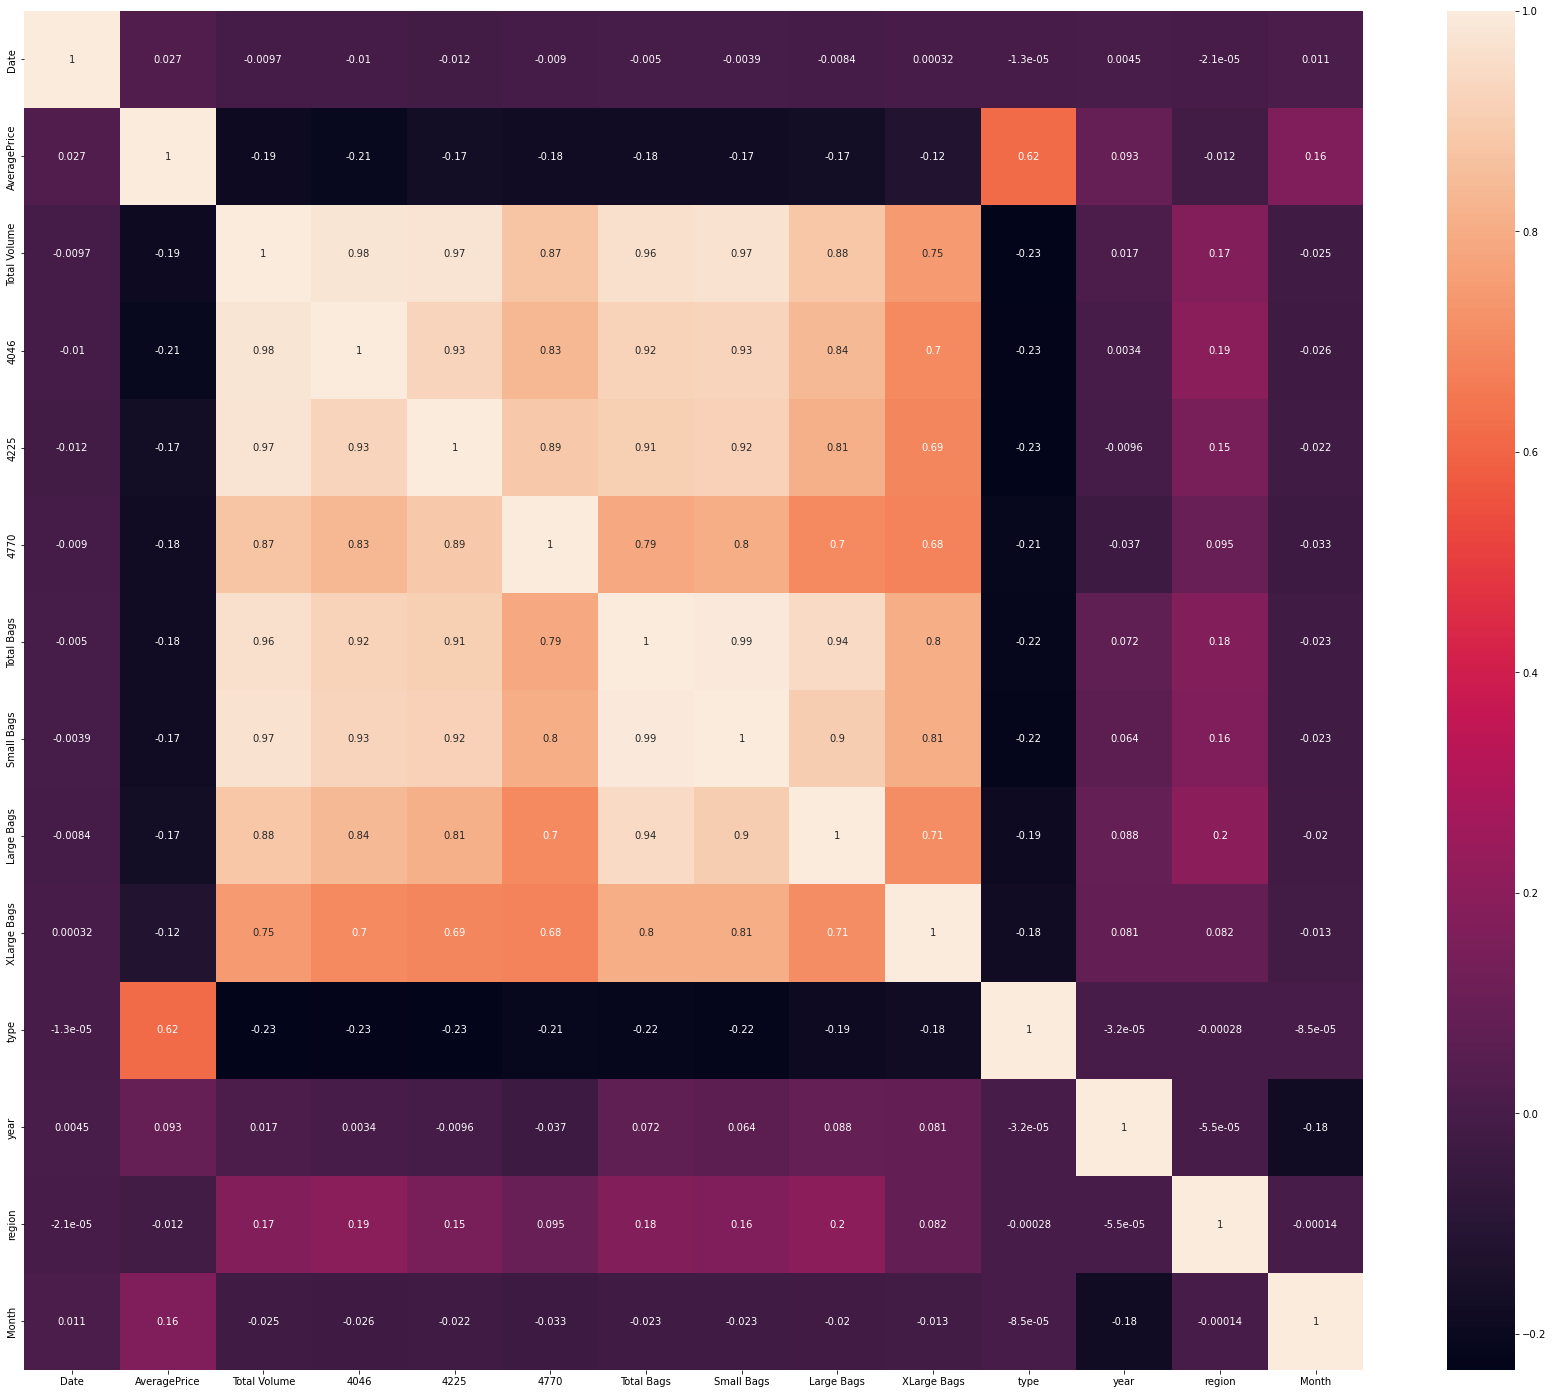

In [42]:
#checking the co-relation of all column to each other
data_cor = data.corr()
plt.figure(figsize=(30,25))
sns.heatmap(data_cor,annot=True)
plt.plot()

As year is most negative co related column among all columns and also the difference is very close of each column

In [43]:
threshold = 3
print(np.where(z<3))
print(data.shape)

(array([    0,     0,     0, ..., 18248, 18248, 18248], dtype=int64), array([ 0,  1,  2, ..., 11, 12, 13], dtype=int64))
(18249, 14)


In [44]:
#Assign the value to df_new which are less the threshold value and removing the outliers
data_new = data[(z<3).all(axis = 1)]

In [45]:
data_new

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015,0,12
1,20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015,0,12
2,13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015,0,12
3,6,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015,0,12
4,29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,4,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,2018,53,2
18245,28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,2018,53,1
18246,21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,2018,53,1
18247,14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,2018,53,1


In [46]:
data=data_new
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015,0,12
1,20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015,0,12
2,13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015,0,12
3,6,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015,0,12
4,29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,4,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,2018,53,2
18245,28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,2018,53,1
18246,21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,2018,53,1
18247,14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,2018,53,1


In [47]:
#now finding the mean value of each column 
print(data['4225'].mean())
print(data['Total Bags'].mean())
print(data['Small Bags'].mean())

165600.94489433893
129816.01636961184
100628.33843918175


In [48]:
#replace the outlier value to its mean value to remove outliers
data.loc[data['4225']<3,'4225'] = np.mean(data['4225'])
data.loc[data['Total Bags']<4.8,'Total Bags'] = np.mean(data['Total Bags'])
data.loc[data['Small Bags']<4,'Small Bags'] = np.mean(data['Small Bags'])

In [ ]:
#plotting the boxplot of each column to check the outliers 
#df.plot(kind='box',subplots = True,layout=(4,5),figsize = (15,10))

In [50]:
data = data_new
print('Shape after removing outlires',data.shape)

Shape after removing outlires (17651, 14)


In [51]:
data.skew()

Date            0.011778
AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455664
4770            5.117170
Total Bags      4.066780
Small Bags      4.222709
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
region          0.012798
Month           0.107408
dtype: float64

In [52]:
#making the skew less than or equal to 0.55 for better prediction and plotting Normal distribution
skew=('Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags')
for col in skew :
    if data.skew().loc[col]>0.55:
        data[col] = np.log1p(data[col])

The best skew value for normally distributes is very close to zero, so we are using “log1p” method to make the skew value near to zero

In [53]:
data.skew()

Date            0.011778
AveragePrice    0.377432
Total Volume   -0.049950
4046           -0.420273
4225           -0.503957
4770            0.068532
Total Bags     -0.319074
Small Bags     -0.435520
Large Bags     -0.610874
XLarge Bags     1.216238
type           -0.037741
year            0.229976
region          0.012798
Month           0.107408
dtype: float64

array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>],
       [<AxesSubplot:title={'center':'4225'}>,
        <AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>],
       [<AxesSubplot:title={'center':'Large Bags'}>,
        <AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'type'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'region'}>,
        <AxesSubplot:title={'center':'Month'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

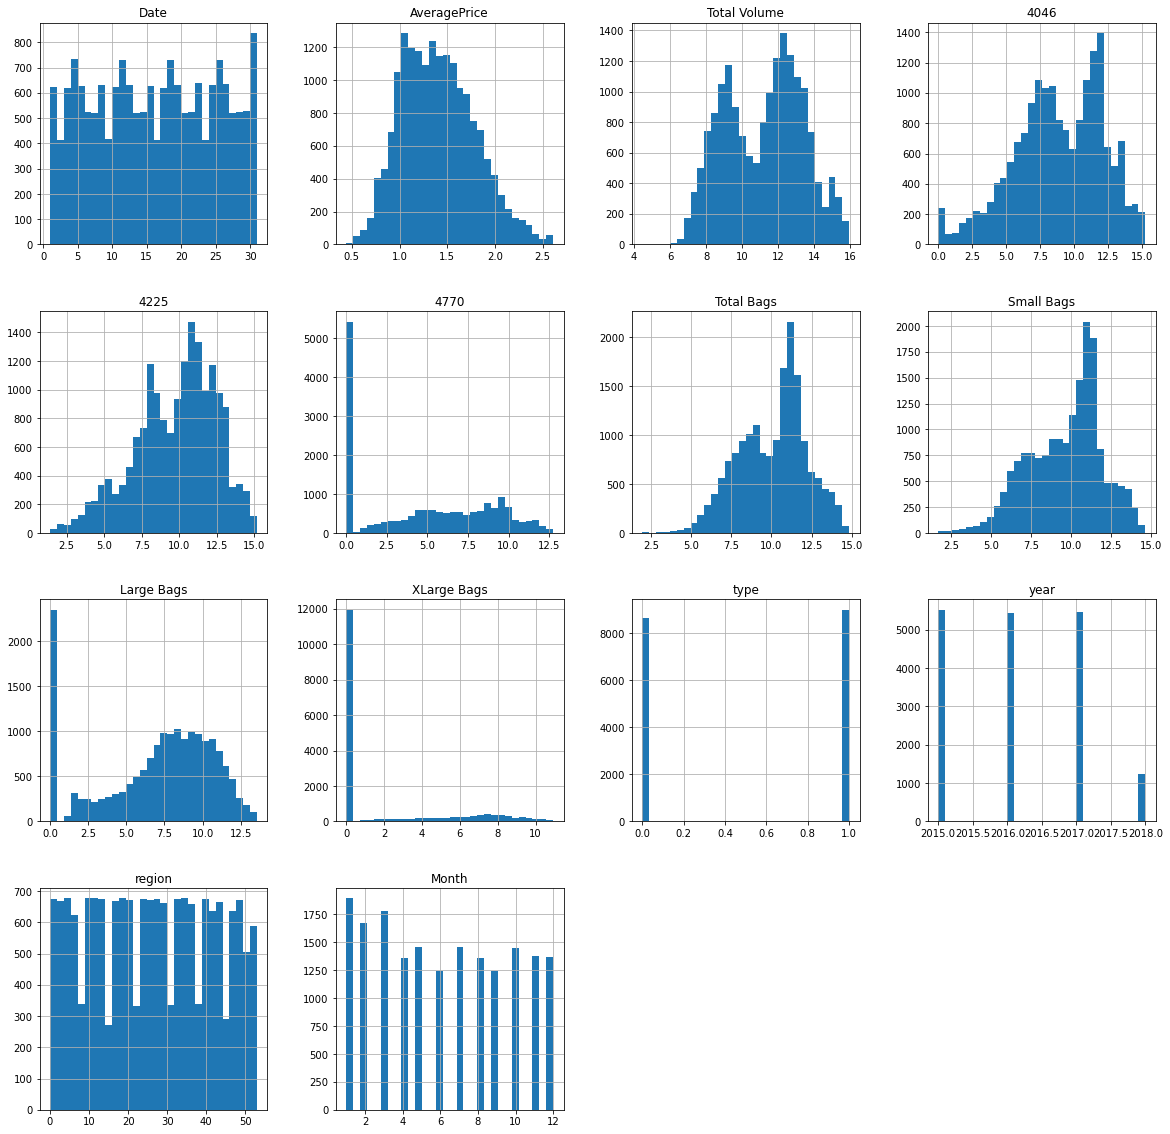

In [54]:
#plotting histogram for univariate analysis and checking the Normal Distribution
data.hist(figsize=(20,20), grid = True, layout = (4,4), bins = 30)

Average price, Total bags and Total volume is well normally distributed data among all column

In [55]:
#assign the value of x and y for training and testing phase
x = data.drop(columns=['AveragePrice','Date'])
y = data[["AveragePrice"]]
print(x.shape)
print(y.shape)

(17651, 12)
(17651, 1)


In [56]:
#Standardize the value of x so that mean will 0 and SD will become 1 , and make the data as normal distributed
sc = StandardScaler()
sc.fit_transform(x)
x = pd.DataFrame(x,columns=x.columns)

# Prediction with Average Price:

In [58]:
#Now by using multiple Algorithms we are calculating the best Algo which suit best for our data set 

model = [DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),LinearRegression(),GradientBoostingRegressor()]
max_r2_score = 0
for r_state in range(0,100):
    train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = r_state,test_size = 0.33)
    for i in model:
        i.fit(train_x,train_y)
        pre = i.predict(test_x)
        r2_sc = r2_score(test_y,pre)
        print("R2 score correspond to random state " ,r_state ,"is", r2_sc)
        if r2_sc> max_r2_score:
            max_r2_score=r2_sc
            final_state = r_state
            final_model = i
            
print()
print()
print()
print()
print("max R2 score correspond to random state " ,final_state , "is" , max_r2_score ,"and model is",final_model)

R2 score correspond to random state  0 is 0.7315164393614069
R2 score correspond to random state  0 is 0.8317897828828988
R2 score correspond to random state  0 is 0.545241254378836
R2 score correspond to random state  0 is 0.5358847181140486
R2 score correspond to random state  0 is 0.7391511985075028
R2 score correspond to random state  1 is 0.7432081296433855
R2 score correspond to random state  1 is 0.8243242232247702
R2 score correspond to random state  1 is 0.5429828592250854
R2 score correspond to random state  1 is 0.5441036317836705
R2 score correspond to random state  1 is 0.738220950079342
R2 score correspond to random state  2 is 0.7540829938881192
R2 score correspond to random state  2 is 0.8308757877289811
R2 score correspond to random state  2 is 0.5555463049776865
R2 score correspond to random state  2 is 0.5373499478175923
R2 score correspond to random state  2 is 0.7383558497599276
R2 score correspond to random state  3 is 0.7295221324386469
R2 score correspond to ran

R2 score correspond to random state  26 is 0.7420524016222199
R2 score correspond to random state  27 is 0.7361198661235624
R2 score correspond to random state  27 is 0.8349126561329473
R2 score correspond to random state  27 is 0.5461682227025084
R2 score correspond to random state  27 is 0.5458675540046511
R2 score correspond to random state  27 is 0.7447002851342166
R2 score correspond to random state  28 is 0.7277640940681466
R2 score correspond to random state  28 is 0.8388550507274882
R2 score correspond to random state  28 is 0.5632362453990615
R2 score correspond to random state  28 is 0.5553268622646256
R2 score correspond to random state  28 is 0.7514538363093264
R2 score correspond to random state  29 is 0.7438362583783528
R2 score correspond to random state  29 is 0.8332856977254864
R2 score correspond to random state  29 is 0.5809321166503343
R2 score correspond to random state  29 is 0.5442786230427075
R2 score correspond to random state  29 is 0.7447990451717978
R2 score

R2 score correspond to random state  53 is 0.5540311648522075
R2 score correspond to random state  53 is 0.5506638081964529
R2 score correspond to random state  53 is 0.7425230057075556
R2 score correspond to random state  54 is 0.7351642408565191
R2 score correspond to random state  54 is 0.8373834191353019
R2 score correspond to random state  54 is 0.5653500546598779
R2 score correspond to random state  54 is 0.5364198520335228
R2 score correspond to random state  54 is 0.7366008283155208
R2 score correspond to random state  55 is 0.7203785984647542
R2 score correspond to random state  55 is 0.8236392318998603
R2 score correspond to random state  55 is 0.5611483626768035
R2 score correspond to random state  55 is 0.5319210408803531
R2 score correspond to random state  55 is 0.7394640425616357
R2 score correspond to random state  56 is 0.7353492849105738
R2 score correspond to random state  56 is 0.8211365778573971
R2 score correspond to random state  56 is 0.5518251094162216
R2 score

R2 score correspond to random state  80 is 0.8251132033066886
R2 score correspond to random state  80 is 0.5659624108062137
R2 score correspond to random state  80 is 0.5439939688602624
R2 score correspond to random state  80 is 0.7444655587445479
R2 score correspond to random state  81 is 0.7503646772801834
R2 score correspond to random state  81 is 0.8251996117019649
R2 score correspond to random state  81 is 0.5418077332162697
R2 score correspond to random state  81 is 0.5339344704217177
R2 score correspond to random state  81 is 0.7359685896739221
R2 score correspond to random state  82 is 0.730994731253678
R2 score correspond to random state  82 is 0.8342654972675346
R2 score correspond to random state  82 is 0.5721600585669702
R2 score correspond to random state  82 is 0.5539792936479959
R2 score correspond to random state  82 is 0.7404662560601432
R2 score correspond to random state  83 is 0.7510191529183267
R2 score correspond to random state  83 is 0.833774378270632
R2 score c

In [59]:
#Checking the best parameter for prediction of KNeighborsRegressor Algo using GridSearchCV
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = 5,test_size = 0.33)
KN = KNeighborsRegressor()
parameters={'n_neighbors' : range(1,30)}
gridsearch=GridSearchCV(KN,parameters)
gridsearch.fit(train_x,train_y)
gridsearch.best_params_

{'n_neighbors': 2}

In [60]:
KNN = KNeighborsRegressor(n_neighbors=2)
KNN.fit(train_x,train_y)
pred = KNN.predict(test_x)
r2_sc = r2_score(test_y,pred)
print("R2 Score :",r2_sc*100)

R2 Score : 85.6795579820649


In [61]:
print('Mean Absolute Error: ', mean_absolute_error(test_y,pred))
print('Mean squared Error: ', mean_squared_error(test_y,pred))
print('Root Mean Absolute Error: ', np.sqrt(mean_absolute_error(test_y,pred)))

Mean Absolute Error:  0.10101287553648071
Mean squared Error:  0.02132982832618026
Root Mean Absolute Error:  0.31782522797361556


Text(0, 0.5, 'Predicted_Y')

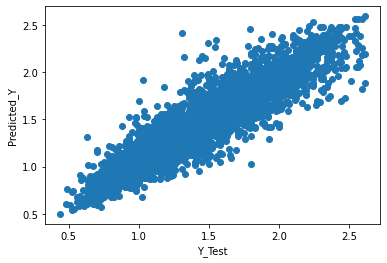

In [62]:
#checking the diff between actual and predicted value using graph
plt.scatter(x=test_y,y=pred)
plt.xlabel('Y_Test')
plt.ylabel('Predicted_Y')

# Prediction with Region:

In [63]:
#importing library for classification prediction
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [64]:
#assign the value of x and y for training and testing phase
x_c = data.drop(columns=['region','Date'])
y_c = data[["region"]]
print(x_c.shape)
print(y_c.shape)

(17651, 12)
(17651, 1)


In [65]:
#Standardize the value of x so that mean will 0 and SD will become 1 , and make the data as normal distributed
sc = StandardScaler()
sc.fit_transform(x_c)
x_c = pd.DataFrame(x_c,columns=x_c.columns)

In [66]:
#Now by using multiple Algorithms we are calculating the best Algo which suit best for our data set 

model = [DecisionTreeClassifier(),KNeighborsClassifier()]
max_accuracy_score = 0
for r_state in range(0,100):
    train_xc,test_xc,train_yc,test_yc = train_test_split(x_c,y_c,random_state = r_state,test_size = 0.33)
    for i_c in model:
        i_c.fit(train_xc,train_yc)
        pre_c = i_c.predict(test_xc)
        ac_score = accuracy_score(test_yc,pre_c)
        print("accuracy score correspond to random state " ,r_state ,"is", ac_score)
        if ac_score> max_accuracy_score:
            max_accuracy_score=ac_score
            final_state = r_state
            final_model = i_c
            
print()
print()
print()
print()

print("max accuracy score correspond to random state " ,final_state , "is" , max_accuracy_score ,"and model is",final_model)
 

accuracy score correspond to random state  0 is 0.7776824034334764
accuracy score correspond to random state  0 is 0.7811158798283262
accuracy score correspond to random state  1 is 0.7818025751072961
accuracy score correspond to random state  1 is 0.7945064377682404
accuracy score correspond to random state  2 is 0.775793991416309
accuracy score correspond to random state  2 is 0.7843776824034335
accuracy score correspond to random state  3 is 0.7864377682403434
accuracy score correspond to random state  3 is 0.7951931330472103
accuracy score correspond to random state  4 is 0.7878111587982832
accuracy score correspond to random state  4 is 0.7836909871244635
accuracy score correspond to random state  5 is 0.7826609442060086
accuracy score correspond to random state  5 is 0.784892703862661
accuracy score correspond to random state  6 is 0.7898712446351931
accuracy score correspond to random state  6 is 0.791931330472103
accuracy score correspond to random state  7 is 0.784034334763948

accuracy score correspond to random state  60 is 0.7893562231759657
accuracy score correspond to random state  61 is 0.7876394849785407
accuracy score correspond to random state  61 is 0.7821459227467811
accuracy score correspond to random state  62 is 0.7847210300429185
accuracy score correspond to random state  62 is 0.7872961373390558
accuracy score correspond to random state  63 is 0.7764806866952789
accuracy score correspond to random state  63 is 0.7811158798283262
accuracy score correspond to random state  64 is 0.7778540772532189
accuracy score correspond to random state  64 is 0.7914163090128755
accuracy score correspond to random state  65 is 0.7840343347639485
accuracy score correspond to random state  65 is 0.7826609442060086
accuracy score correspond to random state  66 is 0.7876394849785407
accuracy score correspond to random state  66 is 0.7934763948497854
accuracy score correspond to random state  67 is 0.7783690987124463
accuracy score correspond to random state  67 is

In [67]:
#Checking the best parameter for prediction of KNeighborsClassifier Algo using GridSearchCV
train_xc,test_xc,train_yc,test_yc = train_test_split(x_c,y_c,random_state = 79,test_size = 0.33)
KNC = KNeighborsClassifier()
parameters={'n_neighbors' : range(1,30)}
gridsearch=GridSearchCV(KNC,parameters)
gridsearch.fit(train_xc,train_yc)
gridsearch.best_params_

{'n_neighbors': 1}

In [68]:
KNC = KNeighborsClassifier(n_neighbors=1)
KNC.fit(train_xc,train_yc)
predc = KNC.predict(test_xc)
acu_score = accuracy_score(test_yc,predc)
print("Accuracy Score :",acu_score*100)

Accuracy Score : 83.84549356223175


In [69]:
#Calculating the scores of different parameters
score = cross_val_score(KNC,x_c,y_c,cv = 100,scoring='accuracy').mean()
print('Cross_val_score : ', score*100)
print('Mean Score      : ' , score.mean()*100)
print('STD score       : ' , score.std())

Cross_val_score :  80.05164997431949
Mean Score      :  80.05164997431949
STD score       :  0.0


In [70]:
pred_prob = KNC.predict_proba(test_xc)[:,1]
pred_prob

array([0., 0., 0., ..., 0., 1., 0.])

In [71]:
fpr,tpr,thresholds = roc_curve(test_yc,pred_prob,pos_label=True)

In [72]:
print(fpr)
print("\n")
print(tpr)
print("\n")
print(thresholds)

[0.         0.00540446 1.        ]


[0.         0.80898876 1.        ]


[2. 1. 0.]


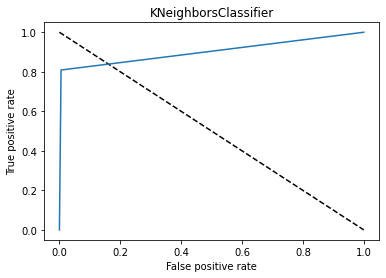

In [73]:
#Plotting the graph which tells us about the area under curve , more the area under curve more will be the better prediction

plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'KNeighborsClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('KNeighborsClassifier')
plt.show()

- taking price as y variable is predicting well for this model as comapared to region
- also r2 score value is also greater then accuracy score